# Configuration

In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np

# Mount Google Drive
drive.mount('/drive')

# specify file path
file_folder = "/drive/MyDrive/Research/metaLLM"
os.chdir(file_folder)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [9]:
%pip install llama-index

INFO: pip is looking at multiple versions of llama-cloud-services to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of llama-cloud-services to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.3/303.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
# ReAct Agent for a single paper

from llama_index.core import (
	SimpleDirectoryReader,
    VectorStoreIndex,
    StorageContext,
    load_index_from_storage,
)

from llama_index.core.tools import QueryEngineTool, ToolMetadata, FunctionTool
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex
from llama_parse import LlamaParse
from llama_index.llms.openai import OpenAI

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /usr/local/lib/python3.12/dist-
[nltk_data]     packages/llama_index/core/_static/nltk_cache...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Example 1: Optical Character Recognition

## LlamaParse

In [ ]:
# select paper
file_names = [file for file in os.listdir(os.path.join(file_folder, 'data/lu_2023'))]
print(len(file_names))
index_sample = file_names.index("Epstein et al_2003_Comparison between two measures of delay discounting in smokers.pdf")
#index_sample = file_names.index("Lu et al. - 2022 - Differential Effects of Fundamental and Longitudin.pdf")
file_name = file_names[index_sample]
print(file_name)

105
Epstein et al_2003_Comparison between two measures of delay discounting in smokers.pdf


In [ ]:
# extraction

file_name_path = os.path.join('./data/lu_2023', file_name)

parser = LlamaParse(
    api_key="llx-0UwQzPNaxiYTPoEUuTn0aLCAmORf4upYIRqFWi8tf0zfUWNQ",  # can also be set in your env as LLAMA_CLOUD_API_KEY
    result_type="markdown",  # "markdown" and "text" are available
    verbose=True,
)
file_extractor = {".pdf": parser}

target_paper = SimpleDirectoryReader(
    input_files=[file_name_path],
    file_extractor=file_extractor,
).load_data()

Started parsing the file under job_id f4894e1a-891b-4e55-a4ad-90b791a43e0b


In [ ]:
print(target_paper[4].text)


This document is copyrighted by the American Psychological Association or one of its allied publishers. This article is intended solely for the personal use of the individual user and is not to be disseminated broadly.

# AGREEMENT AMONG MEASURES OF DELAY DISCOUNTING

# Average Values

# Small $25 Rewards

| 0  | r = .82, p < .01 | 0                  |
| -- | ---------------- | ------------------ |
| 20 | 0                | 0                  |
| OO | cmeoxo           | (00)               |
| 4  | 3                | 2                  |
| 0  | 3                | 2                  |
| 0  | Log k computer   | Log k computer $25 |

# Medium $55 Rewards

| r = .76, p < .01   |                    |          |
| ------------------ | ------------------ | -------- |
| 53                 | 000                | 20       |
| O                  | C                  | ((0O)Z)( |
|                    | ((x(Z•0)           | 00.00O   |
| O                  | R                  | 3        |
| 00     

## Nougat OCR

In [ ]:
!pip install llama-index llama-index-readers-nougat-ocr==0.3.0

INFO: pip is looking at multiple versions of llama-index to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of llama-index to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of llama-index-indices-managed-llama-cloud to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of llama-index-readers-llama-parse to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install transformers==4.38.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 73.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.1.2 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.38.2 which is incompatible.


In [ ]:
!pip install "albumentations<1.3.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.7/116.7 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 2.0.8
    Uninstalling albumentations-2.0.8:
      Successfully uninstalled albumentations-2.0.8


In [ ]:
from llama_index.readers.nougat_ocr import PDFNougatOCR
from pathlib import Path
reader = PDFNougatOCR()
pdf_path = Path(os.path.join('./data/lu_2023', file_name))

documents = reader.load_data(pdf_path)

In [ ]:
full_documents = "/n".join([doc.text for doc in documents])

In [ ]:
print(full_documents)

# Comparison Between Two Measures of Delay Discounting in Smokers

Leonard H. Epstein, Jerry B. Richards,

Frances G. Saad, Rocco A. Paluch, and

James N. Roemmich

University at Buffalo School of Medicine and Biomedical Sciences, University at Buffalo, State University of New York, Farber Hall, Room G56, 3435 Main Street, Building #26, Buffalo, New York 14214-3000. E-mail: lhenet@acsu.buffalo.edu

Caryn Lerman

University of Pennsylvania School of Medicine

###### Abstract

Agreement between computer and questionnaire measures of delay discounting in smokers was compared. Correlations between measures for small, medium, or large rewards were significant. Log $k$ values decreased as the reward delay increased, with values lower for the computer task than the questionnaire, with significant differences for small rewards. The 2 measures were related to smoking rate but not to age, gender, or obesity. The Bland-Altman test of agreement indicated large within-subject differences in $k$ val

Based on the latex code it generated for Table 1, the table appears as:

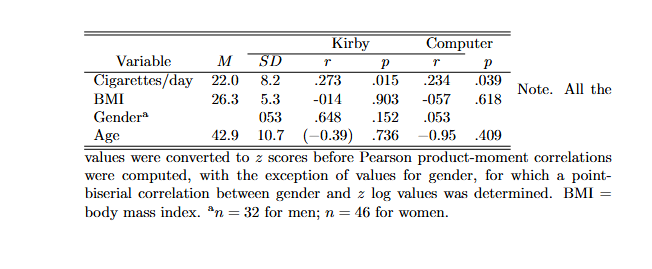

## Mistral OCR

In [ ]:
! pip install mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.8/442.8 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 14.2 MB/s eta 0:00:00


In [ ]:
pdf_path = os.path.join(os.getcwd(), "data/lu_2023/Epstein et al_2003_Comparison between two measures of delay discounting in smokers.pdf")
print(pdf_path)

/drive/MyDrive/Research/metaLLM/data/lu_2023/Epstein et al_2003_Comparison between two measures of delay discounting in smokers.pdf


In [ ]:
import os
from mistralai import Mistral

# load mistral api key
with (open("./mistral.txt", "r")) as file:
  mistral_key = file.read()
os.environ["MISTRAL_API_KEY"] = mistral_key

client = Mistral(api_key=mistral_key)

uploaded_pdf = client.files.upload(
    file={
        "file_name": "uploaded_file.pdf",
        "content": open(pdf_path, "rb"),
    },
    purpose="ocr"
)

In [ ]:
# get results

signed_url = client.files.get_signed_url(file_id=uploaded_pdf.id)

ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": signed_url.url,
    }
)

In [ ]:
# Print the content of the response
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

display(Markdown(get_combined_markdown(ocr_response)))

# Comparison Between Two Measures of Delay Discounting in Smokers 

Leonard H. Epstein, Jerry B. Richards,<br>Frances G. Saad, Rocco A. Paluch, and<br>James N. Roemmich<br>University at Buffalo School of Medicine and Biomedical Sciences

Caryn Lerman<br>University of Pennsylvania School of Medicine


#### Abstract

Agreement between computer and questionnaire measures of delay discounting in smokers was compared. Correlations between measures for small, medium, or large rewards were significant. $\log k$ values decreased as the reward delay increased, with values lower for the computer task than the questionnaire, with significant differences for small rewards. The 2 measures were related to smoking rate but not to age, gender, or obesity. The Bland-Altman test of agreement indicated large within-subject differences in $k$ values between the 2 measures. The size of the difference between the $\log k$ values and magnitude of the $\log k$ values were positively related. Results suggest $k$ values from the 2 measures are related but may not be used interchangeably.


One important component of self-regulation is the delay of immediate gratification to obtain later but larger rewards (Logue \& King, 1991). When provided a choice between a small immediate reward and larger delayed rewards, people reliably discount the value of the larger delayed rewards (Bickel, Madden, \& Petry, 1998; Richards, Zhang, Mitchell, \& de Wit, 1999). Delay discounting has been used as an operational definition of impulsivity. The degree to which individuals discount the value of delayed consequences has been suggested to be an index of impulsivity, with greater discounting indicating greater impulsivity (Ainslie, 1975; Logue, 1988; Rachlin \& Green, 1972; Richards et al., 1999). According to this definition of impulsivity, the behavior of individuals who discount the value of delayed consequences at a high rate is likely to be biased toward immediate consequences over more important delayed consequences. For example, cigarette smokers may choose the immediate effects of smoking over the delayed risk of emphysema and cancer. There is a growing body of evidence that individuals that engage in impulsive behaviors discount the value of delayed rewards more in laboratory tasks (Bickel \& Marsch, 2001; Critchfield \& Kollins, 2001). For example, several studies with drug-dependent individuals have shown that drug users discount the value of delayed rewards more than

[^0]nondrug users. This has been reported for opioid-dependent individuals (Kirby, Petry, \& Bickel, 1999; Madden, Petry, Badger, \& Bickel, 1997), alcohol abusers (Vuchinich \& Simpson, 1998), cigarette smokers (Bickel, Odum, \& Madden, 1999; Mitchell, 1999), and individuals with unspecified histories of drug dependence (Allen, Moeller, Rhoades, \& Cherek, 1998). These results indicate that there are large individual differences in delay discounting and that delay discounting may be a valid model of impulsive behavior in humans.

The most commonly used procedure to measure discounting (Rachlin, Raineri, \& Cross, 1991) determines the value of delayed rewards by presenting the participant with two cards-the amount of the delayed reward (e.g., $\$ 100$ in 1 year) is on one card and the amount of an immediate reward is on the second card (e.g., $\$ 25$ right now). The participants are presented with an ascending sequence of immediate amount cards starting at a low amount and asked whether they prefer the immediate or the delayed reward. The point at which they switch from the delayed to the immediate amount is used to determine an indifference point that indicates how much they value the delayed reward. The same procedure is usually repeated for each delayed reward using a descending sequence to firmly establish the indifference point. A variant on this procedure is to use a computer to present the questions in a random order (Mitchell, 1999) to avoid possible order effects of asking the questions in a strict ascending or descending order.

In an attempt to decrease the number of questions required to determine indifference points, we developed a computer-based adjusting-amount (AA) procedure that adjusts the amount of the immediate alternative to determine indifference points (Richards et al., 1999). The computer generates the questions on the basis of the participant's answers to the preceding questions about preference of immediate versus delayed rewards, which allows the AA procedure to more rapidly determine indifference points. We have used this AA procedure to evaluate the influence of alcohol on discounting (Richards et al., 1999) and have shown that psychiatric patients with disorders related to


[^0]:    Leonard H. Epstein, Jerry B. Richards, Frances G. Saad, Rocco A. Paluch, and James N. Roemmich, Department of Pediatrics, University at Buffalo School of Medicine and Biomedical Sciences; Caryn Lerman, Department of Psychiatry, University of Pennsylvania School of Medicine.

    This work was supported by National Cancer Institute Grant CA88195, awarded to Leonard H. Epstein, and National Cancer Institute Grant CA63562 and Transdisciplinary Tobacco Use Research Center Grant R50 for the National Cancer Institute, awarded to Caryn Lerman.

    Correspondence concerning this article should be addressed to Leonard H. Epstein, Department of Pediatrics, School of Medicine and Biomedical Sciences, University at Buffalo, State University of New York, Farber Hall, Room G56, 3435 Main Street, Building \#26, Buffalo, New York 14214-3000. E-mail: lhenet@acsu.buffalo.edu

impulse control discount at different rates than patients who do not have disorders of impulse control (Crean, de Wit, \& Richards, 2000). The average duration for determining 15 indifference points ( 5 indifference points for each of three reward values) for an individual participant using the AA procedure is 15 min , but this can vary as a function of the consistency of the participant's responding. If the participant is not consistent, then additional questions are asked until a consistent pattern emerges.

Kirby and colleagues (Kirby et al., 1999; Kirby \& Marakovic, 1996) developed a questionnaire that samples 27 immediate versus delayed choices and takes about 5 min to complete. The Kirby questionnaire is much faster and easier to administer than the card- or computer-based procedures described above. The questionnaire provides a simple methodology for obtaining estimates of delay discounting, but, to our knowledge, this methodology has not been compared with more detailed methods for measuring discounting tasks such as the AA task.

The purpose of this study was to compare the relationship and agreement between the AA discounting task and the Kirby questionnaire for assessing discounting of monetary rewards. One approach to comparing the two measures was to calculate the correlation coefficient. Despite the common use of correlations as measures of agreement between measures, there are limitations to use of correlations for this purpose (Bland \& Altman, 1986, 1995). For example, one measure may provide twice the value of the other, and if it does this reliably, the measures would show strong correlations, but the absolute values of the measures would not agree. Alternatively, the measures may differ in agreement at points along the continuum being measured.

It is also possible for measures to be correlated but have inconsistent relationships with important criterion variables. For example, we have shown that self-report and objectively measured physical activity are moderately related, but each of these measures of physical activity are significantly related to different sets of correlates (Epstein, Paluch, Coleman, Vito, \& Anderson, 1996). In assessing the relationship between two measures, it is important to show not only the correspondence between the measures but also their association to other measures. If the measures are assessing the same construct, then the measures should be related in the same way to other variables.

Another way to test the agreement between estimates of delay discounting is to compare discounting of small, medium, and large rewards. Previous studies have shown that small rewards are discounted at a higher rate than large rewards (Green, Myerson, \& McFadden, 1997; Kirby \& Marakovic, 1996). Differential effects of reward amount on the rate of discounting as measured by the two procedures would provide information about the sensitivity of the two procedures. If there is no significant difference between the estimates of discounting for large, medium, and small amounts, and the two tasks are significantly related to each other and share similar relationships to other variables, there is greater confidence that they are measuring similar constructs.

Agreement between the measures can also be studied using the Bland-Altman pairwise comparison approach
(Bland \& Altman, 1986, 1995). This approach is designed to assess the extent to which two measures agree and are interchangeable. The Bland-Altman method calculates the average difference between the two measures and the standard deviation of this difference-the smaller the standard deviations of the difference scores, the better the agreement. The Bland-Altman analysis also identifies whether there is a relationship between the magnitude of the variables and the degree of discrepancy between the measures.

## Method

## Participants

Participants were 32 male and 46 female smokers age 18 years and over. The average participant was $42.9 \pm 10.6$ years of age, smoked $21.9 \pm 8.1$ cigarettes per day, and had a mean body mass index $\left(\mathrm{BMI}=\mathrm{kg} / \mathrm{m}^{2}\right)$ of $26.2 \pm 5.2$. The ethnic distribution in the study was $90 \%$ Caucasian, $9 \%$ African American, and $1 \%$ Hispanic. Thirty-two percent of participants completed high school or less; the remaining $68 \%$ completed some college or technical school or beyond. Smokers were recruited through newspaper advertisements, brochures, flyers, and local media inviting them to participate in a smoking cessation program. Participants were excluded if they met any of the following criteria: smoked fewer than 10 cigarettes a day during the past year; had uncontrolled heart disease; were planning a pregnancy; were pregnant; were lactating; had a seizure disorder; had a history of head trauma or prior seizure; had a brain or central nervous system tumor; had a history of or were currently diagnosed with bulimia or anorexia nervosa; had diabetes; used alcohol excessively; had a current addiction to opiates, cocaine, or stimulants; had current depression or mania; were using chewing tobacco or snuff; or had an Axis I major psychiatric disorder. At the initial screening session, smokers were offered the opportunity to participate in a supplemental study to collect delay-discounting measures.

## Design and Procedure

At the initial visit participants completed standard questionnaires assessing demographics of age, gender, smoking history, and number of cigarettes smoked per day (Lerman et al., 1997). Height and weight were taken to calculate BMI. After collection of this information, participants completed the two delay-discounting measures, presented in a random order across participants.

The monetary-choice questionnaire developed by Kirby et al. (1999) included a fixed set of 27 choices between smaller immediate rewards and larger delayed rewards. An example choice is "Would you prefer $\$ 55$ today or $\$ 75$ in 61 days?" Participants indicated which alternative they would prefer by circling one alternative for each item of the questionnaire. The range of delays included in the Kirby questionnaire was 7 to 186 days. The questionnaire is a sensitive measure of discounting-discriminating discount rates of drug users and nonusers (Kirby et al., 1999; Madden et al., 1997). The Kirby delay-discounting questionnaire was scored using the procedures described by Kirby and colleagues (Kirby et al., 1999). The $k$ values provided by the Kirby questionnaire have a range of 10 discrete steps: $.00016, .00025$, $.00063, .0016, .0039, .010, .0126, .065, .16$, and .25 . Each participant was assigned one of these $k$ values on the basis of his or her answers to the 27 items. The Kirby questionnaire provided $k$ values for high ( $\$ 85, \$ 80, \$ 75$ ), medium ( $\$ 60, \$ 55, \$ 50$ ), and low ( $\$ 35$, $\$ 30, \$ 25$ ) value delayed rewards. Previous research using this procedure (Kirby et al., 1999) showed high value monetary rewards were discounted less than lower value monetary rewards.

Participants also completed a computerized AA choice procedure to assess discounting of delayed reinforcers (Richards et al., 1999). This procedure has been shown to discriminate between psychiatric outpatients with and without a history of impulsive behavior (Crean et al., 2000). Participants were presented with an average of 110 questions. The exact number of questions was determined by the computer test procedure and by how consistently the participants answered the questions. Participants chose between amounts of money available after different delays and amounts of money available immediately. The amount of immediate money was adjusted (by the computer) to determine the point at which the participants were indifferent about the immediate and delayed amounts.

The time delays of the monetary rewards consisted of $2,30,180$, 365 , or 730 days. Discount functions for the different amounts of delayed money ( $\$ 85, \$ 55, \$ 25$ ) were determined. An example question is "Which would you prefer, $\$ 65$ today or $\$ 85$ two days from now?" Participants used the computer mouse to indicate which reward they would prefer. The AA procedure used the answers to previous questions to narrow the range of values from which the value for the next question was selected. This reduced the number of questions needed to estimate the indifference points for the delay and probability discount functions for an individual compared with standard ascending-descending procedures (Rachlin et al., 1991). The amount of immediate money the participant judged to be equivalent to the delayed reward was taken to indicate the subjective value of the delayed rewards. These points of subjective equality were called indifference points. The adjusting nature of the task was masked by not using a predictable algorithm for determining the adjusted value for the subsequent questions. The algorithm used by the AA procedure is described in detail in Richards et al., 1999.

Discounting of reward value as a function of delay (Green, Fry, \& Myerson, 1994) is described by a hyperbolic discount function (Mazur, 1987). The formula used to determine this value is as follows: Value $=\mathrm{A} /(1+k \mathrm{D})$, where "A" represents the amount of the delayed reward, "D" represents the delay, and $k$ represents a free parameter. Indifference points were determined for the five different delays-2, 30, 180, 365, and 730 days-using the AA procedure. The hyperbolic discount equation was then fit to indifference points using a nonlinear curve-fitting program (Origin 6.0, Microcal Software, Inc., Northampton, MA) to determine the value of $k$. In addition to the $k$ values, the curve-fitting procedure provided goodness-of-fit measures, chi-square, and the coefficient of determination $\left(r^{2}\right)$. Outlying $k$ values that were greater than 1.0 or had $r^{2}$ values less than 0.4 were not included in the analysis.

The $\log$ of the $k$ values for the three different delayed amounts were used to normalize the distribution of $k$ values for the computer task. Deviations from normality were determined by calculating skewness statistics and their standard errors. Distributions that have skewness/S.E. skewness values that are greater than 1.96 are considered not to be normally distributed. Before log transformations, the skewness/S.E. skewness values for small, medium, and large rewards were $15.7,17.7$, and 13.6 , respectively, for the computer task, and $14.1,15.8$, and 15.5 , respectively, for the Kirby questionnaire. Log transformations reduced the values for small, medium, and large rewards to $0.97,1.36$, and 1.64 , respectively, for the computer task, and $2.56,0.64$, and 0.51 , respectively, for the Kirby questionnaire. Thus, log transformations drastically reduced skewness for every measure, and with the exception of small rewards for the Kirby questionnaire, the distributions did not deviate from normality after log transformation. The means and standard deviations of the log values for the Kirby questionnaire across the three reward values were $-1.87 \pm 0.55,-2.10 \pm 0.59$, and $-2.18 \pm 0.62$, whereas values for the AA procedures for the
three reward values were $-2.12 \pm 0.68,-2.14 \pm 0.75$, and -2.23 $\pm 0.75$. The $\log$ of the $k$ value was used for all analyses.

Participants were given a one-in-six chance of receiving the reward that they chose on one of the tasks to encourage accurate responding (Griffiths, Rush, \& Puhala, 1996). At the end of the session, participants selected a ball from a bingo device that corresponded to choice made on one of each task. If participants rolled a 6 on a dice they received the reward they chose.

One important consideration in comparing the two tasks was the difference in delay between the two tasks. The Kirby questionnaire has delays up to 186 days, whereas the computer task has delays up to 730 days. Because the computer task also includes a 180-day delay, we compared $\log k$ values for the computer task using all the delays and delays up to 180 days. The $\log k$ values were very similar, with correlations between measures using all the delays and those using only delays up to 180 days of $.94, .93$, and .92 , respectively, for small, medium, and large rewards. In addition, a within-subjects analysis of variance (ANOVA) was used to compare the $\log k$ values between the two sets of delays (all the delays vs. delays up to 180 days) as one within-variable and reward value $(\$ 25, \$ 55, \$ 85)$ as the second within-variable. The analysis showed a significant difference between reward values, $F(2,148)=6.01$, $p<.01$, but there were no differences $(p>.10)$ as a function of length of delay or the interaction of Length of Delay $\times$ Reward Value. The means and standard deviations for the full range of delays across the three reward values $(\$ 25, \$ 55, \$ 85)$ were -2.12 $\pm 0.68,-2.14 \pm 0.75,-2.23 \pm 0.75$, whereas the corresponding means and standard deviations for delays up to 180 days were $-2.05 \pm 0.65,-2.09 \pm 0.73,-2.19 \pm 0.74$. Because the values were very similar, we used the $k$ values for the longer delay, as these were based on more data points (five delays vs. three delays) and provided a more stable estimate of $k$ values.

## Analytic Plan

The Pearson product-moment correlation coefficient between the two measures was calculated, as was the correlation between the average $k$ values on each task and cigarettes per day, education, BMI, gender, and age. To ensure that the correlations were performed on variables that were scaled similarly, variables were converted to $z$ scores prior to correlations being performed. A repeated measures ANOVA, with Task as one within-factor and Amount (small, medium, large) as the second within-factor, was used to determine whether the $k$ values obtained from the two tasks were significantly different.

The Bland-Altman analysis also was completed to compare (Bland \& Altman, 1986, 1995) agreement between the two measures. This procedure calculates the difference between the $\log k$ values for the two measures (computer task - Kirby questionnaire) and the average of the $\log k$ values of the two measures ((computer task + Kirby questionnaire)/2) for each participant. These data were graphed, and the correlation and slope based on the regression model between the difference of the two measures and the average $\log k$ were calculated. The first indicator of agreement is the average of the difference scores. Ideally, this difference would be 0 . The second indicator of agreement is the variability of the discrepancy scores. The Bland-Altman analysis uses the difference between 2 standard deviations from the mean difference as an indicator of within-subject discrepancy. The larger these limits of agreement, the greater the within-subject discrepancy. The third indicator of agreement establishes the regression between the difference score and the average of the two $\log k$ values to determine whether the degree of discrepancy reliably changes as a function of the size of $k$.

## Results

Figure 1 shows the best-fitting hyperbolic discount function to the median of the $k$ values for the three reward values of the AA task. As shown by the plots in Figure 1, the indifference points obtained by the AA task were well described by the hyperbolic discount function at each reward value. The mean $r^{2}$ values for all participants for the small, medium, and large rewards were $.83, .84, .85$, respectively. There is no curve fit for the Kirby questionnaire because it is based on the assumption that the hyperbolic discount equation describes each individual's choices on the questionnaire. Thus, there is no way to assess goodness of fit or how well the assumption of hyperbolic discounting describes each individual's answers to the questions on the Kirby questionnaire.

The average $k$ values for the AA task and the Kirby questionnaire were strongly correlated ( $r=.82, p<.001$ ), as were the correlations for small, medium, and large amounts ( $r \mathrm{~s}=.74-.80, p \mathrm{~s}<.001$ ). These values, with the best-fitting regression between the two, are shown in Figure 2. There are positive slopes of $.62, .60, .60$, and .66 for the average, small, medium, and large values, respectively,
suggesting that the Kirby questionnaire shows an increase of .60 to $.66 \log k$ values for every 1.0 increase in the AA computer task $\log k$ value.

Correlations between the AA task and Kirby questionnaire and cigarettes per day, BMI, gender, and age are shown in Table 1. The degree of relationship between each measure of discounting and the predictors were similar. For example, more cigarettes smoked per day predicted higher impulsivity scores on the AA task $(r=.23, p<.05)$ and on the Kirby questionnaire ( $r=.27, p<.025$ ). BMI, gender, and age did not correlate with either measure. Gender was marginally related to average $k$ values on the AA task ( $p=$ .053), although it was not close to being significant ( $p=$ .65) for the Kirby questionnaire.

The comparison of the $\log k$ values between the two tasks showed there was a significant interaction between task and reward value, $F(2,154)=12.56, p<.001$, as the degree of discounting decreased for the computer task from small to medium to large rewards from -1.94 to -2.14 to -2.23 , respectively, whereas questionnaire values for small to medium to large rewards changed from -1.87 to -2.10 to -2.18 , respectively. Post hoc linear mean comparisons at each level of reward revealed that there were significant
![img-0.jpeg](None)

Figure 1. The best fitting hyperbolic discount functions to the median of the $k$ values for small, medium, or large reward values for the computer task. The top left plot shows the best fitting hyperbolic discount functions for the small, medium, and large rewards on the same graph, with the monetary reward values proportional, whereas the other graphs show the hyperbolic functions for the monetary reward values used.

![img-1.jpeg](None)

Figure 2. Scatterplot of $\log k$ values for the computer task and the Kirby questionnaire. The best fitting regression line (solid line) has been fitted to the data. The dashed line is the line of identity. The top left plot shows the best fitting regression line to the $k$ values averaged across the small, medium, and large reward amounts.
differences for the small reward, $F(1,77)=23.72, p<$ .001 , within both measures but not within the medium reward, $F(1,77)=0.50, p>.05$, or large reward, $F(1$, $77)=0.76, p>.05$. The change in $k$ values with increasing

Table 1
Correlation of the Computer Task and the Kirby
Questionnaire to Descriptive Variables

|  |  |  | Kirby |  | Computer |  |
| :-- | :--: | :--: | :--: | :--: | :--: | :--: |
| Variable | $M$ | $S D$ | $r$ | $p$ | $r$ | $p$ |
| Cigarettes/day | 22.0 | 8.2 | .273 | .015 | .234 | .039 |
| BMI | 26.3 | 5.3 | -.014 | .903 | -.057 | .618 |
| Gender $^{a}$ |  |  | .053 | .648 | .152 | .053 |
| Age | 42.9 | 10.7 | -.039 | .736 | -.095 | .409 |

Note. All the values were converted to $z$ scores before Pearson product-moment correlations were computed, with the exception of values for gender, for which a point-biserial correlation between gender and $z \log$ values was determined. $\mathrm{BMI}=$ body mass index. ${ }^{a} n=32$ for men; $n=46$ for women.
reward values was associated with a main effect of reward levels, $F(2,154)=33.93, p<.001$, across the two tasks. In addition, there was a significant main effect of task, $F(1$, $77)=6.23, p<.02$ ), as the average for the computer task $(-2.13)$ was significantly lower than the average for the Kirby questionnaire ( -1.99 ).

Finally, Bland-Altman plots for average, small, medium, and large amounts are shown in Figure 3. This figure shows that the average discrepancy is $-.14,-.25,-.04$, and -.05 for the average, small, medium, and large amounts, respectively. Thus, the discrepancy between the two measures is greater for small rewards, as shown above in the ANOVA. The range of values encompassed by 2 standard deviations of the discrepancy scores is also shown in Figure 3. The 2 standard deviation limits of agreement were .683 to -.969 , .662 to $-1.166,0.935$ to -1.013 , and .869 to -.959 for the average, small, medium, and large amounts, respectively. The limits of agreement indicate that the range of variation in the discrepancy scores covered by 2 standard deviations from the mean was $40 \%$ to $50 \%$ of the value of the mean $k$

![img-2.jpeg](None)

Figure 3. Bland-Altman plots for the difference between the $\log k$ values for the computer task and the Kirby questionnaire versus the magnitude of the $\log k$ values for the average, small, medium, and large rewards. The 2 standard deviations of the differences are shown to provide an indication of the variability in difference scores. The short dashed line indicates the mean difference between methods, the solid lines indicate 2 standard deviation limits of agreement, the long dashed line indicates relationship between difference scores and average magnitude of the scores. See text for a detailed description.
value. For example, in the case of the $k$ values for the medium reward amount, 2 standard deviations of the discrepancy scores divided by the mean of the two methods for measuring the $k$ value was 0.46 . These results show that there were substantial differences in the values of $k$ assigned to the same participant by the two methods for measuring $k$. The plots in Figure 3 indicate there are significant positive correlations for average, small, medium, and large amounts ( $r \mathrm{~s}=.45, .30, .35$, and .31 , respectively; $p \mathrm{~s}<.01$ ). The positive slopes $(0.31,0.24,0.270 .21)$ associated with these correlations indicate that for each amount of reward, as the values of the measures increased, the discrepancy between the two measures also increased.

The Kirby questionnaire was designed to sample choices that were representative of a range of $k$ values from .00016 to .25 . In the current study no participant had lower discounting values than .00016 , and only 2 participants had higher discounting values than 0.25 in the computer task. If the Bland-Altman analysis is done without these 2 participants, the mean discrepancy is decreased from -0.143 to
$-0.177 k$ values, and the standard deviation is reduced from 0.413 to $0.361 k$ values. The range of scores that capture 2 standard deviations of the measures shifts from -0.969 to 0.683 for all participants to -0.899 to 0.545 for participants who scored inside of the Kirby questionnaire range. The relationship between mean discrepancy and magnitude of average $k$ decreased from 0.45 to 0.36 (both $p \mathrm{~s}<.01$ ), and slope of the regression line decreased from 0.31 to 0.22 . Thus, even without these 2 participants there is a considerable discrepancy, and the degree of discrepancy is still positively associated with magnitude of discounting.

## Discussion

The results of this study show that the AA procedure and the Kirby questionnaire are strongly related for the average discounting values and discounting at each of three reward amounts in smokers. Likewise, the AA procedure and the Kirby questionnaire correlate similarly with other variables,

such as cigarettes smoked and education. The degree of correspondence between the two measures indicates that both procedures were measuring similar choice processes.

Comparison of $k$ values across both tasks showed decreases in discounting as the reward value of the delayed alternative increases and showed that the Kirby questionnaire produces greater levels of overall discounting than the AA procedure. The difference was greatest in comparing $k$ values for small rewards. One possible explanation for the difference between the methods was that participants may have discounting values that are outside the range of the 10 Kirby $k$ values ranging from .00016 to .25 . Removing the 2 participants who scored outside the range of $k$ scores that the Kirby measures did not appreciably change the variability or the pattern of discrepancy. A second possibility is that the Kirby questionnaire is less sensitive than the AA procedure (particularly at larger values of $k$ ) because it provides only 10 discrete $k$ values, whereas the AA procedure provides a continuous measure of $k$. The difference between the 10 discrete estimates of $k$ provided by the Kirby questionnaire increases logarithmically as the value of $k$ increases, so there is a larger distance between possible discrete $k$ values in the Kirby questionnaire at the larger values of $k$.

The Bland-Altman (Bland \& Altman, 1986, 1995) plots showed the limits of agreement, as measured by 2 standard deviations for the discrepancy, between the measures was large. There was a pattern in the comparison of the discrepancy between the two measures, with the Kirby questionnaire scoring lower than the AA procedure when the $k$ values were low and the Kirby questionnaire scoring greater when the $k$ values were greater. These results suggest that the measures may not be interchangeable across all levels of $k$ values.

An investigator could draw different conclusions from the results of the standard correlational techniques, which demonstrated that the measures were strongly correlated ( $r$ s of .74 to .82 ), and that of the Bland-Altman tests of agreement. As discussed by Bland and Altman (Bland \& Altman, 1986), the discrepancy in the outcomes of the correlational and Bland-Altman analyses is because correlational analyses test the strength of the relationship between two measures but not the agreement between two measures. A high correlation can exist between scores if the scores lie along the same line, even if the scale of one axis is twofold the other axis. There is agreement only if the scores lie along the line of identity, which has a slope of 1.0. As shown in Figure 2, the relationship between the Kirby questionnaire and the AA procedure has a slope of approximately 0.6 rather than 1.0 and, therefore, the points do not lie along the line of identity. Thus, as shown in the present data, a high correlation between two sets of measurement data does not mean that there is agreement between the two measures. Because there is no "gold standard" for measuring the value of $k$, it is not possible to determine which measure is the most accurate measure of discounting. The usefulness of each measure depends on the situation in which it is used.

The Kirby questionnaire provides a very efficient method for obtaining estimates of discounting, whereas the AA procedure may provide a more sensitive measure of dis-
counting. An advantage of the Kirby questionnaire is the opportunity to collect discounting data on large samples of participants at very little time and cost, which may be very useful in field and epidemiological studies. The questionnaire may be particularly useful when the emphasis is not on individual change but rather on characterizing trends in particular samples. There are many situations in which a detailed measure of discounting is needed, and a measure in which standard diagnostics for evaluating the fit of the hyperbolic discount function are needed. In these cases the preferred method is the computer-based AA procedure.

There are several design considerations that might influence the interpretation of the results. The questionnaire and computer task provide alternative formats to determine delay discounting, with the questionnaire involving a paper-and-pencil response format and the computer task involving responding on a computer keyboard. Although the questions that are asked of the participant are very similar, it is possible that some of the differences in $k$ values between the tasks are due to differences in response formats. This study attempted to reduce any potential limitations of using hypothetical rewards by having participants receive immediate or delayed rewards on a probabilistic basis, such that participants had a one-in-six chance of receiving one of their choices. Recent research (Johnson \& Bickel, 2002) has shown that similar discounting functions are obtained when using hypothetical or real rewards, making it easier to implement future studies comparing different methods of measuring delay discounting by using only hypothetical rewards. Finally, all the participants in this study were smokers, who have been shown to be more impulsive on delay discounting measures than nonsmokers (Bickel et al., 1999; Mitchell, 1999). It is possible that a different relationship between measures would be obtained if a different population was studied.

There are alternatives to the Kirby and AA procedures for measuring discounting in the laboratory. The most common method for measuring discounting is to ask a prescribed set of questions about every possible combination of delay and reward. These procedures usually systematically increase or decrease the immediate amount (Rachlin et al., 1991), although procedures that randomize the questions have also been used (Mitchell, 1999). There is no gold standard for measurement of delay discounting, and as research in delay discounting and impulsivity matures, identification of sensitive and psychometrically sound measures are needed to provide comparability of major findings across studies. Future researchers may want to study the agreement between alternative laboratory methods to assess discounting to provide information needed to establish a standard measure of discounting.

## References

Ainslie, G. (1975). Specious reward: A behavioral theory of impulsiveness and impulse control. Psychological Bulletin, 82, 463-496.
Allen, T. J., Moeller, F. G., Rhoades, H. M., \& Cherek, D. R. (1998). Impulsivity and history of drug dependence. Drug and Alcohol Dependence, 50, 137-145.

Bickel, W. K., Madden, G. J., \& Petry, N. M. (1998). The price of change: The behavioral economics of drug dependence. Behavior Therapy, 29, 545-565.
Bickel, W. K., \& Marsch, L. A. (2001). Toward a behavioral economic understanding of drug dependence: Delay discounting processes. Addiction, 96, 73-86.
Bickel, W. K., Odum, A. L., \& Madden, G. J. (1999). Impulsivity and cigarette smoking: Delay discounting in current, never, and ex-smokers. Psychopharmacology, 146, 447-454.
Bland, J. M., \& Altman, D. G. (1986). Statistical methods for assessing agreement between two methods of clinical measurement. Lancet, 1, 307-310.
Bland, J. M., \& Altman, D. G. (1995). Comparing methods of measurement: Why plotting difference against standard method is misleading. Lancet, 346, 1085-1087.
Crean, J. P., de Wit, H., \& Richards, J. B. (2000). Reward discounting as a measure of impulsive behavior in a psychiatric outpatient population. Experimental and Clinical Psychopharmacology, 8, 155-162.
Critchfield, T. S., \& Kollins, S. H. (2001). Temporal discounting: Basic research and the analysis of socially important behavior. Journal of Applied Behavior Analysis, 34, 101-122.
Epstein, L. H., Paluch, R. A., Coleman, K. J., Vito, D., \& Anderson, K. (1996). Determinants of physical activity in obese children assessed by accelerometer and self-report. Medicine \& Science in Sports \& Exercise, 28, 1157-1164.
Green, L., Fry, A. F., \& Myerson, J. (1994). Discounting of delayed rewards: A life-span comparison. Psychological Science, 5, 33-36.
Green, L., Myerson, J., \& McFadden, E. (1997). Rate of temporal discounting decreases with amount of reward. Memory and Cognition, 25, 715-723.
Griffiths, R. R., Rush, C. R., \& Puhala, K. A. (1996). Validation of the multiple-choice procedure for investigating drug reinforcement in humans. Experimental and Clinical Psychopharmacology, 4, 97-106.
Johnson, M. W., \& Bickel, W. K. (2002). Within-subject comparison of real and hypothetical money rewards in delay discounting. Journal of the Experimental Analysis of Behavior, 77, $129-146$.
Kirby, K. N., \& Marakovic, N. N. (1996). Delay-discounting probabilistic rewards: Rates decrease as amounts increase. Psychonomic Bulletin \& Review, 3, 100-104.

Kirby, K. N., Petry, N. M., \& Bickel, W. K. (1999). Heroin addicts have higher discount rates for delayed rewards than non-drugusing controls. Journal of Experimental Psychology: General, $128,78-87$.
Lerman, C., Gold, K., Audrain, J., Lin, T. H., Boyd, N. R., Orleans, C. T., et al. (1997). Incorporating biomarkers of exposure and genetic susceptibility into smoking cessation treatment: Effects on smoking-related cognitions, emotions, and behavior change. Health Psychology, 16, 87-99.
Logue, A. W. (1988). Research on self-control: An integrating framework. Behavioral and Brain Sciences, 11, 665-709.
Logue, A. W., \& King, G. R. (1991). Self-control and impulsiveness in adult humans when food is a reinforcer. Appetite, 17, $105-120$.
Madden, G. J., Petry, N. M., Badger, G. J., \& Bickel, W. K. (1997). Impulsive and self-control choices in opioid-dependent patients and non-drug-using control participants: Drug and monetary rewards. Experimental and Clinical Psychopharmacology, 5, 256-262.
Mazur, J. E. (1987). An adjusting procedure for studying delayed reinforcement. In M. L. Commons, J. E. Mazur, J. A. Nevin, \& H. Rachlin (Eds.), Quantitative analyses of behavior: The effect of delay and of intervening events on reinforcement value (Vol. 5, pp. 55-73). Hillsdale, NJ: Erlbaum.
Mitchell, S. H. (1999). Measures of impulsivity in cigarette smokers and non-smokers. Psychopharmacology, 146, 455-464.
Rachlin, H., \& Green, L. (1972). Commitment, choice and selfcontrol. Journal of the Experimental Analysis of Behavior, 17, $15-22$.
Rachlin, H., Raineri, A., \& Cross, D. (1991). Subjective probability and delay. Journal of the Experimental Analysis of Behavior, 55, 233-244.
Richards, J. B., Zhang, L., Mitchell, S. H., \& de Wit, H. (1999). Delay or probability discounting in a model of impulsive behavior: Effect of alcohol. Journal of the Experimental Analysis of Behavior, 71, 121-143.
Vuchinich, R. E., \& Simpson, C. A. (1998). Hyperbolic temporal discounting in social drinkers and problem drinkers. Experimental and Clinical Psychopharmacology, 6, 292-305.

Received May 10, 2002
Revision received October 22, 2002
Accepted October 28, 2002

# Wanted: Your Old Issues! 

As APA continues its efforts to digitize journal issues for the PsycARTICLES database, we are finding that older issues are increasingly unavailable in our inventory. We are turning to our long-time subscribers for assistance. If you would like to donate any back issues toward this effort (preceding 1982), please get in touch with us at journals@apa.org and specify the journal titles, volumes, and issue numbers that you would like us to take off your hands.

# Example 2: Dynamic Effec Size Calculation with ReAct Agent

In [3]:
# load api key
import openai
import os
with open("./api_key.txt", "r") as f:
    api_key = f.read().strip()

os.environ['OPENAI_API_KEY'] =api_key
openai.api_key = os.getenv("OPENAI_API_KEY")

# specify file path
file_folder = "/drive/MyDrive/Research/metaLLM"
os.chdir(file_folder)

# For Google Colab and Activeloop while waiting for Activeloop (April 2024) pending new version
#This line writes the string "nameserver 8.8.8.8" to the file. This is specifying that the DNS server the system
#should use is at the IP address 8.8.8.8, which is one of Google's Public DNS servers.
with open('/etc/resolv.conf', 'w') as file:
   file.write("nameserver 8.8.8.8")

# load api key
import openai
import os
with open("./api_key.txt", "r") as f:
    api_key = f.read().strip()

os.environ['OPENAI_API_KEY'] =api_key
openai.api_key = os.getenv("OPENAI_API_KEY")

#Retrieving and setting the Activeloop API token
f = open("./activeloop.txt", "r")
API_token=f.readline().strip()
f.close()
ACTIVELOOP_TOKEN=API_token
os.environ['ACTIVELOOP_TOKEN'] =ACTIVELOOP_TOKEN

In [ ]:
# load OCR extracted papers
import pickle

with open('./data/ocr/paper_ocr_list_nougat.pkl', 'rb') as f:
    paper_ocr_list = pickle.load(f)

In [ ]:
# prompt
full_prompt = """Here is the full content of a research paper:

{full_documents}

Based on the above paper, please:

Act as a experienced psychology researcher, extract statistics and the corresponding sample size indicating the age effect on delay discounting in this paper.
Delay discounting is typically measured by k value, area under the curve (AUC), or indifference points.
The statistics should be relevant and sufficient for calculating an effect size like Cohen's d or Pearson's r.

Structure the output as follows:

1. For each reported statistics, provide the following structured data:
    - Effect Context: Briefly describe the effect being measured so that its direction can be obtained. (e.g., "Older adults showed higher temporal discounting").
    - Reported Statistics: Extract all available statistics needed to calculate effect sizes:
        - For mean/sd: Report sample size, mean, and standard deviation for each group (e.g., "Group 1 (adolescents): n=30, Mean=5.2, SD=1.3; Group 2 (adults): n=35, Mean=6.8, SD=1.5").
        - For t-tests: Extract t-value, degrees of freedom, and sample sizes for each group (e.g., "t=2.5, df=63, n1=30, n2=35").
        - For ANOVA or F-statistics: Report F-value, degrees of freedom, and sample sizes.
        - For eta-squared or partial eta-squared: Extract eta-squared value and specify if it's partial (e.g., partial eta-squared = 0.05, n=90).
        - If the paper directly reported effect size in the metric of Cohen's d or Pearson's r, directly report them (e.g., r = 0.150, n=90).

2. Output format (example for a mean/sd comparison):
    [Effect Context]: Older adults showed less discounting.
    [Reported Statistics]: Group 1: n=30, Mean=5.2, SD=1.3; Group 2: n=35, Mean=6.8, SD=1.5

Additional guidelines:
1. If multiple statistics are reported in different studies, conditions, samples (e.g., smokers), methods (e.g., indifference points) of the paper, provide each one separately in this format.
2. For the effect context, be specific about the direction of the effect (e.g., Adolescents showed higher temporal discounting).
3. Please remember to go through all tables to check whether there are statistics related to discounting for each age group OR correlations between age and discounting.
4. DO NOT extract irrelevant statistics like correlation between age and IQ or SES.
"""


## Extractor

In [ ]:
# define extractor
import re
import openai
from openai import OpenAI
client = OpenAI()

class Extractor:
  def __init__(self, model, prompt):
    self.model = model
    self.prompt = prompt

  def clean_references(self, content):
    """
    Remove references from the extracted text. This function removes citations
    like [1], [2], and the entire References section if present.
    """
    # Remove the References section if it exists
    content = re.sub(r'(References|Discussion)\s.*', '', content, flags=re.DOTALL)

    return content

  def extract_statistics(self, document):
    # load the ocr text
    ocr_documents = "/n".join([doc.text for doc in document])
    #print("successfully loaded the paper")
    ocr_documents = self.clean_references(ocr_documents)
    #print("successfully cleaned the paper")
    # set up the prompt
    full_prompt = self.prompt.format(full_documents = ocr_documents)

    # extract effect sizes
    response = client.chat.completions.create(
        model = self.model,
        temperature = 0.0,
        messages=[
                {"role": "system", "content": ""},
                {"role": "user", "content": full_prompt},
            ])

    # Split the text into chunks if multiple effects were detected
    response = response.choices[0].message.content
    es_list = re.split(r'\n+\s*(?=\d+\. )', response.strip())

    return es_list

In [ ]:
# extract statistics based on full text
extractor = Extractor(model = "gpt-4o", prompt = full_prompt)
es_list = extractor.extract_statistics(paper_ocr_list[1])

In [ ]:
es_list

["1. **Effect Context**: Young adults showed a decrease in delay discounting with age.\n   - **Reported Statistics**: Kendall's tau = -0.23, p = 0.005, n = 84",
 "2. **Effect Context**: Older adults showed an increase in delay discounting with age.\n   - **Reported Statistics**: Kendall's tau = 0.15, p = 0.051, n = 104",
 "3. **Effect Context**: Physical age showed a stronger association with delay discounting for young adults.\n   - **Reported Statistics**: Kendall's tau = -0.27, p = 0.001, n = 84",
 "4. **Effect Context**: Physical age showed a stronger association with delay discounting for older adults.\n   - **Reported Statistics**: Kendall's tau = 0.17, p = 0.028, n = 104",
 "5. **Effect Context**: No significant association between chronological age and delay discounting in the middle-aged group.\n   - **Reported Statistics**: Kendall's tau = -0.03, p = 0.78, n = 54",
 "6. **Effect Context**: Life history strategy negatively associated with delay discounting across all ages.\n  

In [ ]:
type(es_list)

list

## Censor

In [ ]:
# define Censor

class Censor:
    """
    Core 'censor' stage:
    - Filter & normalize extractor outputs (es_list)
    - Enforce coding protocol
    - Return only kept, canonicalized effect texts for the coder

    Since LLMs struggle with copying digits, this step only return BOOLEAN values.
    """
    def __init__(self, model, refine_prompt):
      self.model = model
      self.prompt = refine_prompt
      self.prompts = []
      self.responses = []  # Store raw responses here

    def normalize_token(self, token):
        t = (token or "").strip().upper()
        if t in {"KEEP", "[KEEP]", "K", "YES", "Y"}:
            return "KEEP"
        if t in {"DROP", "[DROP]", "D", "NO", "N"}:
            return "DROP"
        return ""

    # LLM censoring based on the protocol
    def censor_es(self, es_list, coding_protocol):
      # apply light filtering
      es_list_cleaned = es_list
      # attach protocols
      full_prompt = self.prompt.format(coding_protocol=coding_protocol, es_list_cleaned=es_list_cleaned)
      self.prompts.append(full_prompt)

      response = client.chat.completions.create(
        model = self.model,
        temperature = 0.0,
        messages=[
                {"role": "system", "content": ""},
                {"role": "user", "content": full_prompt},
            ])

      return (response.choices[0].message.content or "").strip()

    def parse_answer_to_bool(self, answer):
      """
      Parse LLM answer like 'KEEP' or 'DROP' (allow short notes like 'KEEP: reason').
      Return True/False, or None if unparsable.
      """
      first_line = (answer.splitlines()[0] if answer else "").strip()
      m = re.match(r"^\s*([A-Za-z\[\]]+)", first_line)
      if not m:
        return None
      token = self.normalize_token(m.group(1))
      if token == "KEEP":
        return True
      if token == "DROP":
        return False
      return None

    def judge_one(self, item_text, coding_protocol):
      """
      Judge a single item. If unparsable, fall back to False (DROP).
      """
      raw = self.censor_es(item_text, coding_protocol)
      self.responses.append(raw)
      flag = self.parse_answer_to_bool(raw)
      return bool(flag)

    def judge_all(self, es_list, coding_protocol):
      """
      Sequentially judge each item in es_list, one API call per item.
      """
      results = []
      for s in es_list:
          results.append(self.judge_one(s, coding_protocol))
      return results

In [ ]:
coding_protocol = """
Inclusion Criteria:
The text must：
(a) related to delay discounting
(b) examine age effects on delay discounting (e.g., a correlation, comparisons across age groups, etc)
(c) focus on chronological age only
"""

single_prompt_template = """
You are the CENSOR in a meta-analysis pipeline.
Decide whether the SINGLE statistics text should be included for the analysis according to the protocol.

=== Coding Protocol ===
{coding_protocol}
=== END PROTOCOL ===

=== Candidate text ===
{es_list_cleaned}
=== END CANDIDATE ===

Rules:
- Output ONLY one of:
  - KEEP
  - DROP
  (The first word must be KEEP or DROP, followed by the reason)
- Keep only if ALL required inclusion criteria are satisfied.
- Do not infer from outside the candidate text.

Now output KEEP or DROP (one line).
"""

censor = Censor(model="gpt-4o", refine_prompt=single_prompt_template)
flags = censor.judge_all(es_list, coding_protocol)

In [ ]:
flags

[True, True, False, False, True, False]

In [ ]:
# Access all raw responses
for i, response in enumerate(censor.responses):
  print(f"Item {i}: {response}")

Item 0: KEEP because the text is related to delay discounting, examines age effects on delay discounting, and focuses on chronological age.
Item 1: KEEP because the text is related to delay discounting, examines age effects on delay discounting, and focuses on chronological age only.
Item 2: DROP because the text does not examine age effects on delay discounting across different age groups or correlations with chronological age.
Item 3: DROP, because the text does not explicitly mention examining age effects on delay discounting, only that there is an association with physical age.
Item 4: KEEP because the text is related to delay discounting, examines age effects on delay discounting, and focuses on chronological age.
Item 5: DROP, the text does not examine age effects on delay discounting specifically, as it only mentions a general association with life history strategy across all ages without focusing on chronological age.


In [ ]:
for i, (prompt, response) in enumerate(zip(censor.prompts, censor.responses)):
    print(f"\n=== Item {i} ===")
    print(f"Prompt:\n{prompt}")
    print(f"\nResponse:\n{response}")
    print(f"Flag: {flags[i]}")


=== Item 0 ===
Prompt:

You are the CENSOR in a meta-analysis pipeline.
Decide whether the SINGLE statistics text should be included for the analysis according to the protocol.

=== Coding Protocol ===

Inclusion Criteria:
The text must： 
(a) related to delay discounting  
(b) examine age effects on delay discounting (e.g., a correlation, comparisons across age groups, etc)
(c) focus on chronological age only 

=== END PROTOCOL ===

=== Candidate text ===
1. **Effect Context**: Young adults showed a decrease in delay discounting with age.
   - **Reported Statistics**: Kendall's tau = -0.23, p = 0.005, n = 84
=== END CANDIDATE ===

Rules:
- Output ONLY one of:
  - KEEP
  - DROP
  (The first word must be KEEP or DROP, followed by the reason)
- Keep only if ALL required inclusion criteria are satisfied.
- Do not infer from outside the candidate text.

Now output KEEP or DROP (one line).


Response:
KEEP because the text is related to delay discounting, examines age effects on delay disco

## Coder

In [ ]:
!pip install llama-index-vector-stores-deeplake==0.1.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: llama-index-core
    Found existing installation: llama-index-core 0.14.7
    Uninstalling llama-index-core-0.14.7:
      Successfully uninstalled llama-index-core-0.14.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llama-index 0.14.7 requires llama-index-core<0.15.0,>=0.14.7, but you have llama-index-c

In [ ]:
!pip install deeplake==3.9.18

  Using cached deeplake-3.9.18.tar.gz (608 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pillow-10.2.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached boto3-1.40.64-py3-none-any.whl.metadata (6.6 kB)
  Using cached pathos-0.3.4-py3-none-any.whl.metadata (11 kB)
  Using cached humbug-0.3.2-py3-none-any.whl.metadata (6.8 kB)
  Using cached lz4-4.4.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached aioboto3-15.5.0-py3-none-any.whl.metadata (8.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 7.1 MB

In [49]:
!pip install llama-index==0.10.64

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of llama-index-indices-managed-llama-cloud to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of llama-index-indices-managed-llama-cloud to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of llama-index-readers-llama-parse to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of llama-cloud-services to determine which version is compatible with other requirements. This could take a wh

In [4]:
# define ES functions
import math
from llama_index.core import VectorStoreIndex
from llama_index.core.tools import QueryEngineTool, ToolMetadata, FunctionTool
from llama_index.core.vector_stores import MetadataFilter, MetadataFilters, FilterOperator

def mean_to_cohens_d(y1: float, y2: float, s1: float, s2: float, n1: int, n2: int) -> float:
    """
    Calculate Cohen's d and its variance using mean/sd for two independent groups.

    Arguments:
    y1 : float : Mean of the first group
    y2 : float : Mean of the second group
    s1 : float : Standard deviation of the first group
    s2 : float : Standard deviation of the second group
    n1 : int   : Sample size of the first group
    n2 : int   : Sample size of the second group

    Returns:
    d : float : Cohen's d, the standardized mean difference between two groups
    """
    # Calculate pooled standard deviation (S_within)
    s_within = math.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    # Calculate Cohen's d
    d = (y2 - y1) / s_within
    var = ((n1 + n2) / (n1*n2)) + (d**2 / (2 * (n1 + n2)))
    return {
      "effect_size": d,
      "variance": var,
      "effect_size_type": "Cohen's d"
    }

def mean_to_hedges_g(y1: float, y2: float, s1: float, s2: float, n1: int, n2: int) -> float:
    """
    Calculate Hedge's g and its variance using mean/sd for two independent groups.

    Arguments:
    y1 : float : Mean of the first group
    y2 : float : Mean of the second group
    s1 : float : Standard deviation of the first group
    s2 : float : Standard deviation of the second group
    n1 : int   : Sample size of the first group
    n2 : int   : Sample size of the second group

    Returns:
    g : float : Hedge's g, the standardized mean difference between two groups
    """
    s_within = math.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    d = (y2 - y1) / s_within
    var_d = ((n1 + n2) / (n1*n2)) + (d**2 / (2 * (n1 + n2)))

    df = n1 + n2 - 2
    J = 1 - (3 / (4 * df - 1))

    g = J * d
    var_g = J**2 * var_d
    return {
      "effect_size": g,
      "variance": var_g,
      "effect_size_type": "Hedge's g"
    }

def eta_squared_to_r(eta_squared: float, n: int) -> float:
    """
    Convert eta-squared (η²) to Pearson's r.

    Arguments:
    eta_squared : float : Eta-squared value from ANOVA or other effect-size measures
    n : int   : Total sample size

    Returns:
    r : float : Pearson's r, representing the proportion of variance explained by the predictor
    """
    r = math.sqrt(eta_squared)
    var_r = (1 - r**2)**2 / (n - 1)
    return {
      "effect_size": r,
      "variance": var_r,
      "effect_size_type": "Pearson's r"
    }

def t_statistic_to_cohens_d(t_value: float, n1: int, n2: int) -> float:
    """
    Calculate Cohen's d using the t-test statistic for two independent samples.

    Arguments:
    t_value : float : t-test statistic representing the standardized difference between two groups
    n1 : int : Sample size of the first group
    n2 : int : Sample size of the second group

    Returns:
    d : float : Cohen's d, the standardized mean difference between two groups
    """
    d = t_value * math.sqrt((n1 + n2) / (n1 * n2))
    var_d = ((n1 + n2) / (n1*n2)) + (d**2 / (2 * (n1 + n2)))

    df = n1 + n2 - 2
    J = 1 - (3 / (4 * df - 1))

    g = J * d
    var_g = J**2 * var_d
    return {
      "effect_size": g,
      "variance": var_g,
      "effect_size_type": "Pearson's r"
    }

def tau_to_r(tau: float, n: int) -> float:
    """
    Convert the Spearman's rank correlation coefficient (τ) to Pearson's r.

    Arguments:
    tau : float : Spearman's rank correlation coefficient

    Returns:
    r : float : Pearson's r, representing the proportion of variance explained by the predictor
    """
    r = math.sin(math.pi*tau/2)
    var_r = (1 - r**2)**2 / (n - 1)
    return {
      "effect_size": r,
      "variance": var_r,
      "effect_size_type": "Pearson's r"
    }

# define a ReAct agent for coding
from llama_index.core.agent import ReActAgent
from llama_index.llms.openai import OpenAI
from llama_index.vector_stores.deeplake import DeepLakeVectorStore
# formating outputs
from llama_index.core.output_parsers import PydanticOutputParser
from pydantic import BaseModel
from typing import Literal, Optional
from pydantic import BaseModel, Field
import json

# output format
class ExtractedInfo(BaseModel):
    effect_size: float = Field(..., description="Effect size value")
    variance: float = Field(..., description="Sampling variance of the effect size")
    direction: Literal["positive", "negative"] = Field(..., description="Sign of the age effect")
    effect_size_type: Literal["Cohen's d", "Pearson's r"] = Field(..., description="Metric type")

class EffectSizeAgent:
    def __init__(self):
      self.llm = OpenAI(model="gpt-4o",api_key=os.environ["OPENAI_API_KEY"])
      self.agent = None
      self.parser = PydanticOutputParser(ExtractedInfo)

    def setup_function_tools(self):
      """
      Provide a set of functions for calculating the effect size.
      """
      calculation_tool_list = [
            FunctionTool.from_defaults(fn=mean_to_hedges_g),
            FunctionTool.from_defaults(fn=eta_squared_to_r),
            FunctionTool.from_defaults(fn=t_statistic_to_cohens_d),
            FunctionTool.from_defaults(fn=tau_to_r)
        ]
      return calculation_tool_list

    def setup_query_tools(self):
      """
      Load the vectorbase of the target paper. If no record is found, create the vectorbase.
      """
      dataset_path = "hub://junsonglu/metaLLM_lu2023"
      vector_store = DeepLakeVectorStore(dataset_path=dataset_path, read_only=True)
      index = VectorStoreIndex.from_vector_store(vector_store=vector_store)

      # Create query engine with metadata filter
      query_engine = index.as_query_engine(
          similarity_top_k=5,
          llm=self.llm,
          #filters={"file_name": file_name}
          )

      query_tool = QueryEngineTool.from_defaults(
              query_engine,
              name="full text of the paper",
              description="A RAG engine with the full text of the paper from which statistics are extracted from.",
      )

      return query_tool

    def initialize_agent(self):
      context = """
      You are an expert research assistant specializing in psychology and meta-analysis.
      Your task is to calculate effect sizes of the age effect on delay discounting from available statistics.

      When you are completely done, produce the final result in this exact form:
      {
        "effect_size": <float>,
        "variance": <float>,
        "direction": "positive" | "negative",
        "effect_size_type": "Cohen's d" | "Pearson's r"
      }

      Rules for the final answer:
      - The JSON must be valid and parseable by json.loads.
      - No extra commentary after Final Answer.
      - "direction" is "negative" if higher age = less discounting; otherwise "positive".
      """
      function_tools = self.setup_function_tools()
      #query_tools = self.setup_query_tools()
      all_tools = function_tools #+ [query_tools]

      self.agent = ReActAgent.from_tools(
          all_tools,
          llm=self.llm,
          max_iterations=5,
          #output_parser=self.parser, # force to produce JSON
          context=context,
          verbose=True
      )

    def extract_effect_size(self, stats):
      prompt = """
      Please check the available statistics and its context:
      {stats}.

      Based on the statistics and context:
      1. Decide which effect size metric to use, Cohen's d or Pearson's r. If mean/sd, t, and F statistics are available, calculate Cohen's d.
      If eta squared is available, calculate Pearson's r correlation.
      2. Calculate the effect size using the available functions and determine its sign, with a negative effect indicating older age associated with less discounting.
      3. If the statistics are insufficient to use any available functions (e.g., the sample size for one group is missing), consult the original paper.
      """
      response = self.agent.chat(prompt.format(stats=stats))
      return response


ModuleNotFoundError: No module named 'llama_index.vector_stores'

In [ ]:
# initializa the agent
ESagent = EffectSizeAgent()
ESagent.initialize_agent()

In [ ]:
es_list = ["1. **Effect Context**: Young adults showed a decrease in delay discounting with age.\n   - **Reported Statistics**: Kendall's tau = -0.23, p = 0.005, n = 84",
 "2. **Effect Context**: Older adults showed an increase in delay discounting with age.\n   - **Reported Statistics**: Kendall's tau = 0.15, p = 0.051, n = 104",
 "3. **Effect Context**: Physical age showed a stronger association with delay discounting for young adults.\n   - **Reported Statistics**: Kendall's tau = -0.27, p = 0.001, n = 84",
 "4. **Effect Context**: Physical age showed a stronger association with delay discounting for older adults.\n   - **Reported Statistics**: Kendall's tau = 0.17, p = 0.028, n = 104",
 "5. **Effect Context**: No significant association between chronological age and delay discounting in the middle-aged group.\n   - **Reported Statistics**: Kendall's tau = -0.03, p = 0.78, n = 54",
 "6. **Effect Context**: Life history strategy negatively associated with delay discounting across all ages.\n   - **Reported Statistics**: Kendall's tau = -0.15, p = 0.002, n = 242\n\nThese statistics provide insights into the age-related effects on delay discounting, allowing for the calculation of effect sizes such as Cohen's d or Pearson's r where applicable."]

In [ ]:
flags = [True, True, False, False, True, False]
es_list_filtered = [es for idx, es in enumerate(es_list) if flags[idx]]

In [ ]:
# code effect sizes
es_code = ESagent.extract_effect_size(es_list_filtered[1])

> Running step 784a7330-98ca-4329-847e-ab39cb5466df. Step input: 
      Please check the available statistics and its context:
      2. **Effect Context**: Older adults showed an increase in delay discounting with age.
   - **Reported Statistics**: Kendall's tau = 0.15, p = 0.051, n = 104.

      Based on the statistics and context:
      1. Decide which effect size metric to use, Cohen's d or Pearson's r. If mean/sd, t, and F statistics are available, calculate Cohen's d.
      If eta squared is available, calculate Pearson's r correlation.
      2. Calculate the effect size using the available functions and determine its sign, with a negative effect indicating older age associated with less discounting.
      3. If the statistics are insufficient to use any available functions (e.g., the sample size for one group is missing), consult the original paper.
      
Thought: The current language of the user is English. I need to use a tool to help me answer the question. The reported stati

In [ ]:
print(es_code.response)

{
  "effect_size": 0.2334453638559054,
  "variance": 0.008679382705152843,
  "direction": "positive",
  "effect_size_type": "Pearson's r"
}


In [ ]:
# code all effect sizes
es_results = []

for i, stats in enumerate(es_list_filtered, start=1):
  print(f"Coding effect {i}/{len(es_list_filtered)} ...")
  try:
      result = ESagent.extract_effect_size(stats)
      es_results.append(result.response)
  except Exception as e:
      print(f"Error at index {i}: {e}")

Coding effect 1/3 ...
> Running step b2af19f7-47ff-443a-a12e-1e3a681c83ea. Step input: 
      Please check the available statistics and its context:
      1. **Effect Context**: Young adults showed a decrease in delay discounting with age.
   - **Reported Statistics**: Kendall's tau = -0.23, p = 0.005, n = 84.

      Based on the statistics and context:
      1. Decide which effect size metric to use, Cohen's d or Pearson's r. If mean/sd, t, and F statistics are available, calculate Cohen's d.
      If eta squared is available, calculate Pearson's r correlation.
      2. Calculate the effect size using the available functions and determine its sign, with a negative effect indicating older age associated with less discounting.
      3. If the statistics are insufficient to use any available functions (e.g., the sample size for one group is missing), consult the original paper.
      
Thought: The current language of the user is English. I need to use a tool to help me answer the questio

In [ ]:
es_results

['{\n  "effect_size": -0.35347484377925714,\n  "variance": 0.009225568542298408,\n  "direction": "negative",\n  "effect_size_type": "Pearson\'s r"\n}',
 '{\n  "effect_size": 0.2334453638559054,\n  "variance": 0.008679382705152843,\n  "direction": "positive",\n  "effect_size_type": "Pearson\'s r"\n}',
 '{\n  "effect_size": -0.04710645070964266,\n  "variance": 0.018784280917785397,\n  "direction": "negative",\n  "effect_size_type": "Pearson\'s r"\n}']

# Example 3: Iterative Retrieval

In [8]:
# load OCR-extracted papers
from llama_index.core import SimpleDirectoryReader
from llama_index.core import SummaryIndex, VectorStoreIndex

doc_names = os.listdir('./data/lu_2023_include_OCR_Mistral')
document = SimpleDirectoryReader(input_files=["./data/lu_2023_include_OCR_Mistral/Mok et al_2020_Is it time.md"]).load_data()

safe_name = "Mok_et_al_2020_Is_it_time"
persist_dir_vec = f"./data/storage_psychbull/{safe_name}"

vector_index = VectorStoreIndex.from_documents(document)
summary_index = SummaryIndex.from_documents(document)


In [28]:
# save the indices
vector_index.storage_context.persist(persist_dir=persist_dir_vec)
summary_index.storage_context.persist(persist_dir=persist_dir_vec)

## Create Tools and Test

In [9]:
# create related tools

from llama_index.core.tools import QueryEngineTool

# for summarizing the paper structure
summary_query_engine = summary_index.as_query_engine(
  response_mode="tree_summarize",
  use_async=True,
)

summary_tool = QueryEngineTool.from_defaults(
  query_engine=summary_query_engine,
  description=(
    "Useful for summarizing the paper structure."
  ),
)

# for retrieval
vector_query_engine = vector_index.as_query_engine()
vector_tool = QueryEngineTool.from_defaults(
  query_engine=vector_query_engine,
  description=(
    "Useful for retrieving specific context from the paper."
  ),
)

# selector
from llama_index.core.query_engine.router_query_engine import RouterQueryEngine
from llama_index.core.selectors import LLMSingleSelector

query_engine = RouterQueryEngine(
    selector=LLMSingleSelector.from_defaults(),
    query_engine_tools=[
        summary_tool,
        vector_tool,
    ],
    verbose=True
)

# for coding the moderator "Delay_Length_Min" and "Delay_Length_Max"
def analyze_delay_range(values):
  """
  Compute min and max delay length in the delay discounting task.
  Input: a list of numbers (e.g., [1, 5, 10])
  Output: a dict with 'Delay_Length_Min' and 'Delay_Length_Max'.
  """
  if not values:
      return {"Delay_Length_Min": None, "Delay_Length_Max": None}

  return {
      "Delay_Length_Min": min(values),
      "Delay_Length_Max": max(values)
  }

In [32]:
response = query_engine.query("What is the structure of the paper?")
print(str(response))

Selecting query engine 0: Useful for summarizing the paper structure..
The paper is structured into two experiments. Experiment 1 examines the effects of personally relevant cues associated with delayed rewards on discounting behavior in young and older adults. Experiment 2 investigates the impact of personal cues on risky decision-making in a probability discounting task. The general discussion section provides an overview of the findings from both experiments, discussing age-related differences in discounting behavior, the influence of episodic cues on decision-making, and the implications for understanding intertemporal choice and risky decision-making. The paper covers various topics such as age-related differences in delay discounting, the effects of personally relevant cues on decision-making tasks, the relationship between delay and probability discounting, the role of different brain regions in decision-making, and potential interventions to enhance decision-making across diffe

## Agentic Retrieval Augmented Generation

In [18]:
# define ES functions
import math
from llama_index.core import VectorStoreIndex
from llama_index.core.tools import QueryEngineTool, ToolMetadata, FunctionTool
from llama_index.core.vector_stores import MetadataFilter, MetadataFilters, FilterOperator

# define a ReAct agent for coding
from llama_index.core.agent import ReActAgent
from llama_index.llms.openai import OpenAI

class delayAgent:
    def __init__(self):
      self.llm = OpenAI(model="gpt-4o",api_key=os.environ["OPENAI_API_KEY"])
      self.agent = None

    def setup_function_tools(self):
      """
      Provide a set of functions for deriving the moderator.
      """
      calculation_tool_list = [
            FunctionTool.from_defaults(fn=analyze_delay_range,
            name="analyze_delay_range",
            description="Compute min and max delay lengths in a list of numbers.",
            return_direct=True),

        ]
      return calculation_tool_list

    def setup_query_tools(self):
      """
      Load the vectorbase of the target paper.
      """

      # for summary
      summary_query_engine = summary_index.as_query_engine(
        response_mode="tree_summarize",
        use_async=True,
      )

      summary_tool = QueryEngineTool.from_defaults(
        query_engine=summary_query_engine,
        name="summary_query",
        description=(
          "Useful for summarizing the paper structure."
        ),
      )

      # for retrieval
      vector_query_engine = vector_index.as_query_engine(
          similarity_top_k=5,
      )
      vector_tool = QueryEngineTool.from_defaults(
          query_engine=vector_query_engine,
          name="vector_query",
          description=(
            "Useful for retrieving specific context from the paper."
          ),
      )

      return [summary_tool, vector_tool]

    def initialize_agent(self):
      context = """
      You are an expert research assistant for psychology meta-analysis.
      Task: For each study in the paper, identify the delay lengths used in the delay-discounting tasks.
      Procedure:
      1) Summarize paper structure and number of studies using the summary query engine.
      2) Retrieve method sections for each study to identify delay lengths using query engines. If other metrics like weeks or years are used, convert into days.
      3) Use available function(s) to compute Delay_Length_Min and Delay_Length_Max for each study.
      """
      function_tools = self.setup_function_tools()
      query_tools = self.setup_query_tools()
      all_tools = function_tools + query_tools

      self.agent = ReActAgent.from_tools(
          all_tools,
          llm=self.llm,
          max_iterations=10,
          context=context,
          verbose=True
      )

    def extract_moderators(self):
      """
      Run the agent to extract moderator information.
      """
      if self.agent is None:
        self.initialize_agent()

      query = (
          "Extract all delay lengths in days (minimum and maximum) used in the "
          "delay discounting tasks across all studies in this paper. "
      )

      try:
        response = self.agent.chat(query)
        return response
      except Exception as e:
        print(f"Error during extraction: {e}")
        return None

In [19]:
# extract the moderator
import nest_asyncio
nest_asyncio.apply()

agent_sep_engine = delayAgent()
result_sep_engine = agent_sep_engine.extract_moderators()

> Running step dcb6b352-9978-43e4-a28d-5c8b815cfb1d. Step input: Extract all delay lengths in days (minimum and maximum) used in the delay discounting tasks across all studies in this paper. 
Thought: The current language of the user is English. I need to use a tool to help me answer the question by first summarizing the paper structure to identify the number of studies.
Action: summary_query
Action Input: {'input': 'Summarize the structure of the paper and identify the number of studies included.'}
Observation: The paper is structured around two experiments. Experiment 1 focuses on delay discounting, while Experiment 2 examines probability discounting. These studies investigate the effects of personally relevant cues on decision-making processes in young and older adults. The paper includes a total of two studies: one on delay discounting and the other on probability discounting.
> Running step 007a0108-5687-4254-86d5-3b365d5338da. Step input: None
Thought: The paper includes two expe

In [22]:
print(result_sep_engine.response)

{'Delay_Length_Min': 7, 'Delay_Length_Max': 3650}
